##Introduction to Regression with neural nertworks in tensorflow

There are many definitions for a regression problem but in our case, we are going to simplify it: predicting  a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [85]:
import tensorflow as tf

###Creating data to view and fit

In [86]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

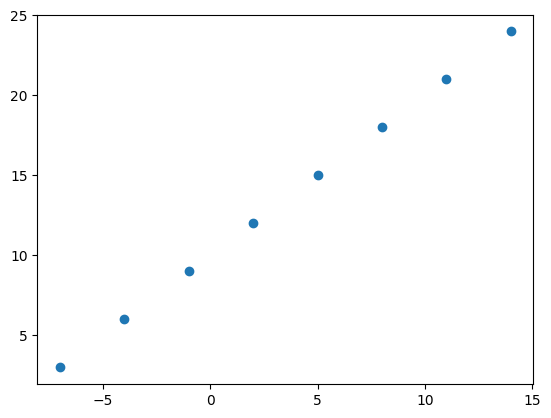

In [87]:
#Visualize it
plt.scatter(X,y)

In [88]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

###Input and Output shapes

In [89]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price= tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [90]:
input_shape = X.shape
output_shape = y.shape
input_shape,output_shape

((8,), (8,))

In [91]:
X[0].ndim

0

In [92]:
X[0],y[0]

(-7.0, 3.0)

In [93]:
#Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

##Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [94]:
##model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))


In [95]:
#set the random seed
tf.random.set_seed(42)

#Create the model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"] )

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 460ms/step - loss: 18.7816 - mae: 18.7816
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 18.5004 - mae: 18.5004
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 18.2191 - mae: 18.2191
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 17.9379 - mae: 17.9379
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 17.6566 - mae: 17.6566


In [96]:
#Check out x and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [97]:
#Try and make prediction using our model
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 100ms/step


array([[-15.031032]], dtype=float32)

In [98]:
y_pred + 11

array([[-4.0310316]], dtype=float32)

###Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden layers. Within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of optimization function.
3. **Fitting the model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [99]:
#Let's rebuild our model

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss =  tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics = ["mae"] )

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 477ms/step - loss: 16.4745 - mae: 16.4745
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 16.1932 - mae: 16.1932
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 15.9120 - mae: 15.9120
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 15.6307 - mae: 15.6307
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 15.3495 - mae: 15.3495
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 15.0682 - mae: 15.0682
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 14.8355 - mae: 14.8355
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 14.7030 - mae: 14.7030
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 14.5705 - mae: 14.5705
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 14.4380 - mae: 14.4380
Epoch 11/100
1/1 [==============================] - 0

In [100]:
#Remind ourself of our data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [101]:
#Let's see if model prediction has improved or not
model.predict([17.0])

1/1 [==============================] - 0s 98ms/step


array([[29.297298]], dtype=float32)

In [102]:
#Let's rebuild our model

#Create a model with extra hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])


#Compile the model
model.compile(loss =  tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), metrics = ["mae"] )

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 537ms/step - loss: 13.5878 - mae: 13.5878
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.8573 - mae: 12.8573
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.1221 - mae: 12.1221
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3815 - mae: 11.3815
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6340 - mae: 10.6340
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.8776 - mae: 9.8776
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 9.1104 - mae: 9.1104
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.3305 - mae: 8.3305
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5362 - mae: 7.5362
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.7858 - mae: 6.7858
Epoch 11/100
1/1 [==============================] - 0s 9ms/step 

In [103]:
#Remind ourself of our data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [104]:
#Let's see if model prediction has improved or not
model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[27.019096]], dtype=float32)

###Evaluating Our Model

When it comes to evaluation... there are 3 words you should memorize:

"Visualize, visualize, visualize"

It's a good idea to visualize:

The data - what data are we working with? What does it look like?
The model itself - what does our model look like?
The training of a model - how does a model perform while it learns?
The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [105]:
#Make a bigger dataset
X=  tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [106]:
#Make labels for dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

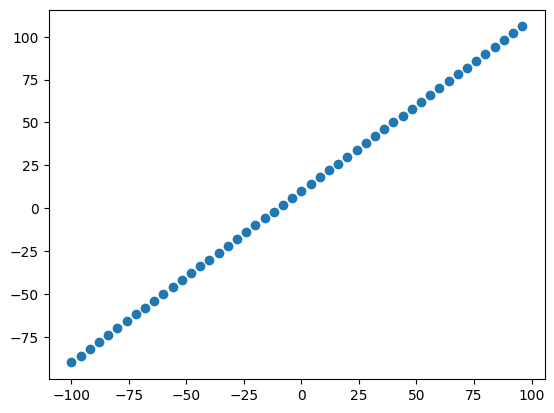

In [107]:
#Visualize
plt.scatter(X,y)

###The 3 sets...

**Training set**- the model learns from this data, which is typically 70-80% of the total data you have available.

**Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.

**Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [108]:
#Check the length of how many samples we have
len(X)

50

In [109]:
#Split data into train and test set
X_train = X[:40]
y_train = y[:40]


X_test = X[40:]
y_test = y[40:]

###Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

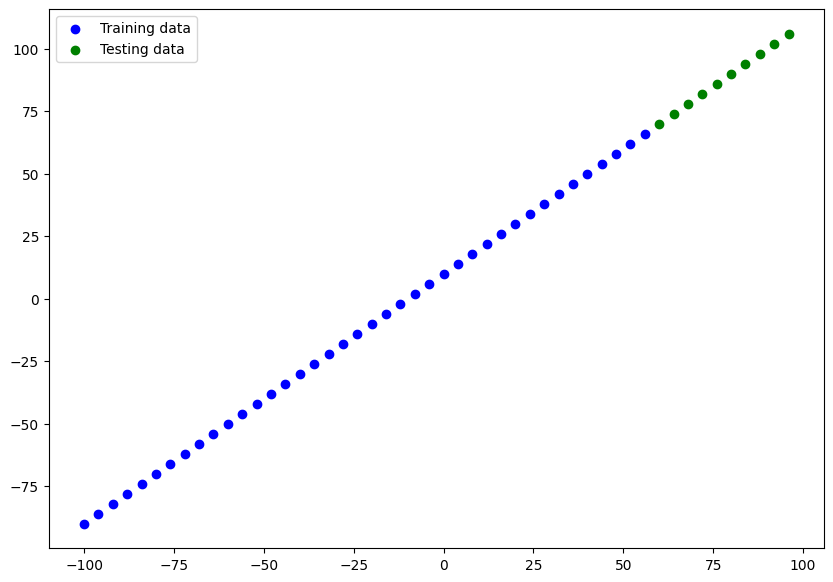

In [110]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data")
#Plot testing data in green
plt.scatter(X_test,y_test,c="g",label="Testing data")
plt.legend()




In [111]:
#Let's build a neural network for our data

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss="mae" , optimizer=tf.keras.optimizers.SGD() , metrics=["mae"])

#3.Fit the model
#model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

In [112]:
#model.summary()

In [113]:
#Let's create a model which builds automatically by defining the input shape argument in the first layer
tf.random.set_seed(42)

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1] ,name="input_layer"),
    tf.keras.layers.Dense(1 ,name="output_layer")

],name="model_1")

#2. Compile the model
model.compile(loss="mae" , optimizer=tf.keras.optimizers.SGD() , metrics=["mae"])




In [114]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Total params** - total number of parameters in the model.

**Trainable parameters** - these are the parameters (patterns) the model can update as it trains.

**Non-trainable params** - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during transfer learning).

In [115]:
#Let's fit model to our training data
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=200,verbose=0)

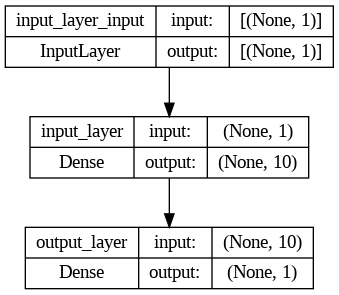

In [116]:
from tensorflow.keras.utils import plot_model
plot_model(model= model , show_shapes=True)

###Visualizing model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of **y_test** or **y_true** versus **y_pred** (ground truth versus your model's predictions).

In [117]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 54ms/step


array([[58.10832 ],
       [61.786915],
       [65.46551 ],
       [69.14411 ],
       [72.82271 ],
       [76.50131 ],
       [80.1799  ],
       [83.858505],
       [87.537094],
       [91.2157  ]], dtype=float32)

In [118]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [119]:
#Create a plotting function

def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_label, c="b", label= "Training Data")

  #Plot testing data in green
  plt.scatter(test_data, test_label, c="g", label= "Testing Data")

  #Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r" ,label ="Predictions" )

  plt.legend()




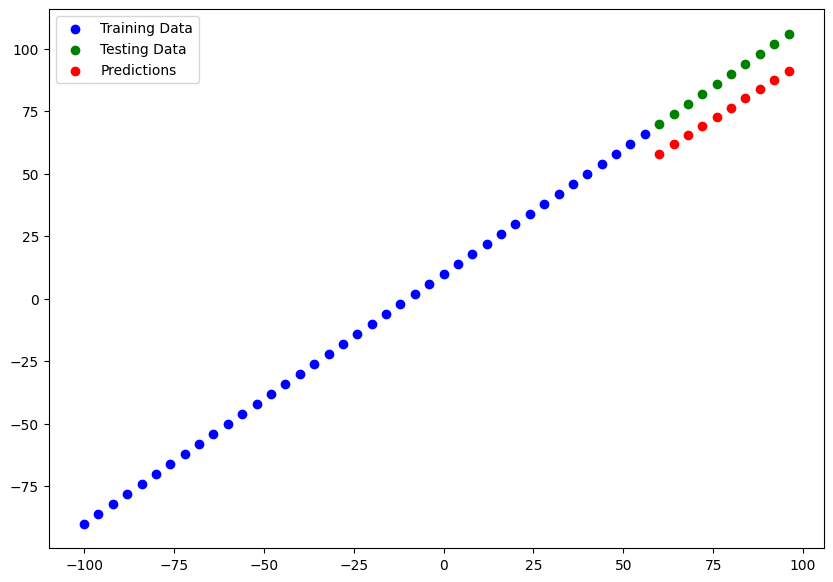

In [120]:
plot_predictions()

Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
MSE - mean square error, "square the average errors"

In [121]:
#Evaluate model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 126ms/step - loss: 13.3380 - mae: 13.3380


[13.337994575500488, 13.337994575500488]

In [122]:
#Calculate mean absolute error
mae = tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([29.891682, 26.213085, 22.534492, 18.855888, 15.741834, 13.299212,
       11.52804 , 10.428299, 10.      , 10.243139], dtype=float32)>

In [123]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[58.10832 ],
       [61.786915],
       [65.46551 ],
       [69.14411 ],
       [72.82271 ],
       [76.50131 ],
       [80.1799  ],
       [83.858505],
       [87.537094],
       [91.2157  ]], dtype=float32)>

In [124]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [125]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([58.10832 , 61.786915, 65.46551 , 69.14411 , 72.82271 , 76.50131 ,
       80.1799  , 83.858505, 87.537094, 91.2157  ], dtype=float32)>

In [126]:
#Calculate mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.337993>

In [127]:
#Calculate mean square error
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=178.75427>

In [128]:
#Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

###Running experiments to improve our model
```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

**model_1** - same as the original model, 1 layer, trained for 100 epochs

**model_2** - 2 layers, trained for 100 epochs

**model_3** - 2 layers, trained for 500 epochs

Build model_1

In [129]:
tf.random.set_seed(42)

In [130]:
#1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
#3. fit
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 20.0044 - mae: 20.0044
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5408 - mae: 7.5408
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 7.9778 - mae: 7.9778
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7.9695 - mae: 7.9695
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1979 - mae: 10.1979
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4568 - mae: 9.4568
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5924 - mae: 8.5924
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0451 - mae: 9.0451
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.8086 - mae: 18.8086
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1452 - mae: 10.1452
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss

1/1 [==============================] - 0s 49ms/step


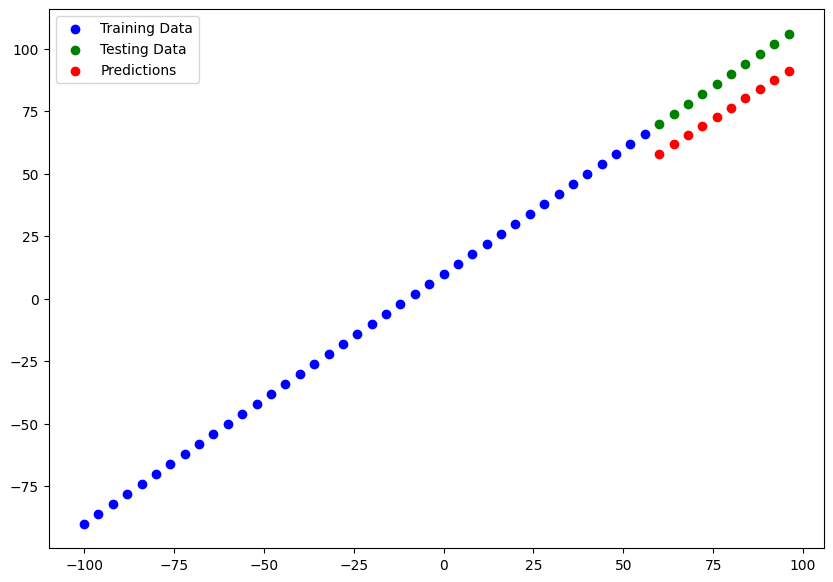

In [131]:
#Make and plot predictions for model_1
y_preds_1 = model.predict(X_test)
plot_predictions(predictions=y_pred)

In [132]:
#Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=13.337993>,
 <tf.Tensor: shape=(), dtype=float32, numpy=178.75427>)

`Build model_2`

2 dense layers, trained for 100 epochs

In [133]:
#set the random seed
tf.random.set_seed(42)

In [134]:
#Create the model

model_2 =  tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ["mse"])

#Fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 17ms/step - loss: 17.9669 - mse: 519.6030
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 12.1731 - mse: 192.9327
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 33.0298 - mse: 1644.4404
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 15.2222 - mse: 308.5746
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 18.5263 - mse: 465.0852
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.3359 - mse: 123.4380
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 10.2982 - mse: 138.6291
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 11.2114 - mse: 178.8053
Epoch 9/100
2/2 [==============================] - 0s 22ms/step - loss: 42.0306 - mse: 2821.8374
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 29.2257 - mse: 1208.2971
Epoch 11/100
2/2 [=====================

1/1 [==============================] - 0s 141ms/step


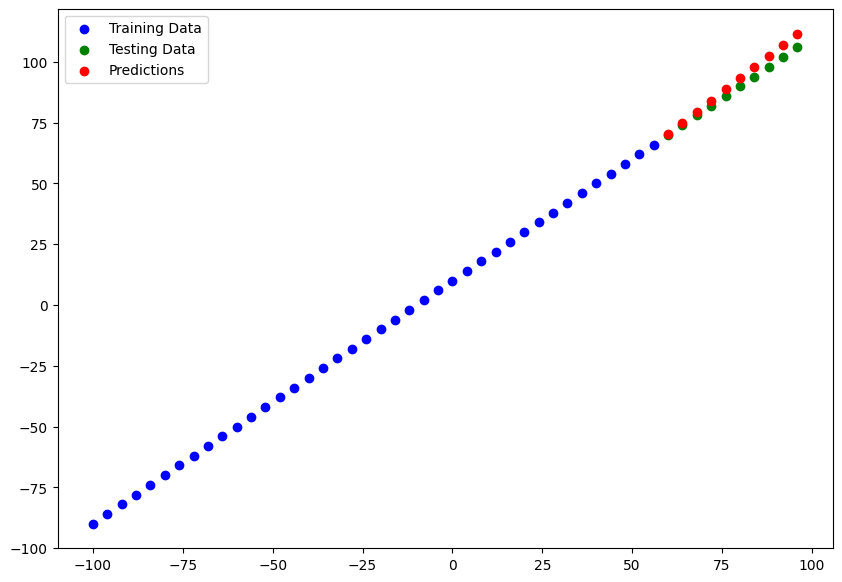

In [135]:
#Make and plot predictions of model 2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [136]:
#Calculate model_2 evaluation metrics
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9893684>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.694559>)

`Build model_3`

2 layers, trained for 500 epochs

In [137]:
#random seed
tf.random.set_seed(42)

In [138]:
#Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),

])

#compile
model_3.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

#Fit
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose=0)


1/1 [==============================] - 0s 137ms/step


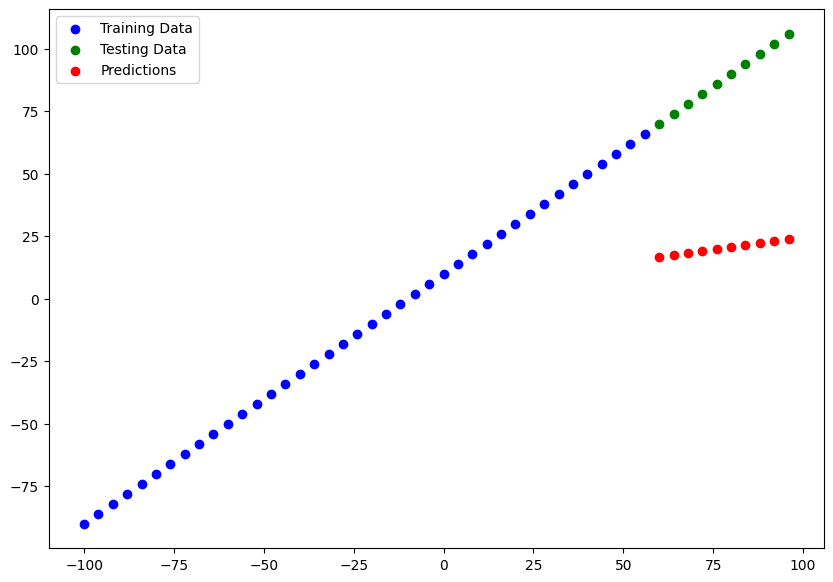

In [139]:

#Make and plot predictions of model 2
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions= y_preds_3)

In [140]:
#Calculate model evaluation metrics
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.80044>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4681.221>)

###Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [141]:
#Compare model's result using Pandas Dataframe
import pandas as pd


In [142]:
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mse","mae"])
all_results

,model,mse,mae
0,model_1,13.337993,178.754272
1,model_2,2.989368,11.694559
2,model_3,67.800438,4681.221191


Looks like `model_2 ` performed the best

In [143]:
model_2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                20        
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 Resource: As you build more models, you'll want to look into using:

**TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).

**Weights & Biases** - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

##Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [144]:
#Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [145]:
#Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Loading in a saved model

In [146]:
#Load in the Saved Model Format
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                20        
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [147]:
#Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 96ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [148]:
#Load in the HDF5 Format
loaded_HDF5_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_HDF5_format.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                20        
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [149]:
#Compare model_2 predictions with HDF5 format model predictions
model_2_preds = model_2.predict(X_test)
loaded_HDF5_preds = loaded_HDF5_format.predict(X_test)
model_2_preds == loaded_HDF5_preds

1/1 [==============================] - 0s 91ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

###Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [150]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##A Larger Example

In [151]:
import matplotlib.pyplot as plt

In [153]:
#Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [155]:
 #One-hot encoding our dataset
 insurance_one_hot = pd.get_dummies(insurance)
 insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [159]:
#Create X and y (features and label)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [162]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [161]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [165]:
#Create training and testing dataset
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [166]:
#Build a neural network
tf.random.set_seed(42)

#Create a model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile
insurance_model.compile(loss = "mae",
                        optimizer = "sgd",
                        metrics = ["mae"])

#Fit
insurance_model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13177.7402 - mae: 13177.7402
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12260.6504 - mae: 12260.6504
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12168.1650 - mae: 12168.1650
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12091.2881 - mae: 12091.2881
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11972.9834 - mae: 11972.9834
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 11778.7061 - mae: 11778.7061
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 11440.2969 - mae: 11440.2969
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10916.4854 - mae: 10916.4854
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10297.2227 - mae: 10297.2227
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 9653.266

In [167]:
#Check the result of insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 1s 3ms/step - loss: 8916.9688 - mae: 8916.9688


[8916.96875, 8916.96875]

###Improving the model

Right now it looks like our model isn't performing too well... let's try and improve it!

1. To (try) improve our model, we'll run 2 experiments:

2. Add an extra layer with more hidden units and use the Adam optimizer
Same as above but train for longer (200 epochs)


In [180]:
#Build a neural network
tf.random.set_seed(42)

#Create a model

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile
insurance_model_2.compile(loss = "mae",
                        optimizer = "Adam",
                        metrics = ["mae"])

#Fit
insurance_model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13340.9658 - mae: 13340.9658
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13322.5654 - mae: 13322.5654
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13287.2119 - mae: 13287.2119
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13220.3525 - mae: 13220.3525
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13105.7725 - mae: 13105.7725
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 12929.4521 - mae: 12929.4521
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12695.4531 - mae: 12695.4531
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12435.7061 - mae: 12435.7061
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 12216.7969 - mae: 12216.7969
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 12119.78

In [181]:
#Check the result of insurance model on the test data
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8627.8564 - mae: 8627.8564


[8627.8564453125, 8627.8564453125]

In [191]:
#Build a neural network
tf.random.set_seed(42)

#Create a model

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#Compile
insurance_model_3.compile(loss = "mae",
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

#Fit
history = insurance_model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 5ms/step - loss: 13247.4746 - mae: 13247.4746
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 12413.9912 - mae: 12413.9912
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 12117.5547 - mae: 12117.5547
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 11986.5273 - mae: 11986.5273
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 11730.6406 - mae: 11730.6406
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 10812.9521 - mae: 10812.9521
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 8898.0879 - mae: 8898.0879
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 8312.3564 - mae: 8312.3564
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 8286.0801 - mae: 8286.0801
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 8288.0811 - ma

In [192]:
#Check the result of insurance model on the test data
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8653.6230 - mae: 8653.6230


[8653.623046875, 8653.623046875]

Text(0.5, 0, 'epochs')

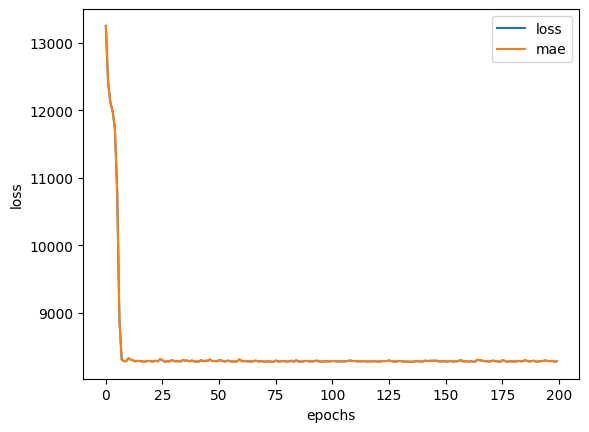

In [193]:
#Plot history also known as loss curve or training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

###Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [197]:
#Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [198]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler() , ["age", "bmi", "children"]), #turn all the values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [199]:
#create X and y
X=  insurance.drop("charges",axis=1)
y = insurance["charges"]

In [200]:
#Train and test data
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

#fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [202]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [203]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [210]:
#Build a neural network  to fit on our normalized data
tf.random.set_seed(42 )

#Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

#Compile

insurance_model_4.compile(loss = "mae",
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])
#Fit
history = insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13279.8652 - mae: 13279.8652
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 10836.3584 - mae: 10836.3584
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7976.7456 - mae: 7976.7456
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7336.9434 - mae: 7336.9434
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 6544.5366 - mae: 6544.5366
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 4951.0771 - mae: 4951.0771
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 3773.4480 - mae: 3773.4480
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 3679.8149 - mae: 3679.8149
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 3638.1416 - mae: 3638.1416
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 3619.4050 - mae: 3619.

In [211]:
#Check the result of insurance model on the normalized data
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3161.9868 - mae: 3161.9868


[3161.98681640625, 3161.98681640625]

Text(0.5, 0, 'epochs')

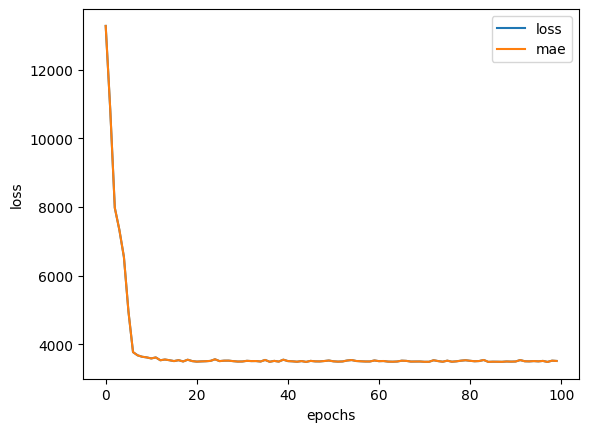

In [212]:
#Plot history also known as loss curve or training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")